## IMPOPRTO LAS LIBRERIAS NECESARIAS

In [1]:
# Librerias de manejo de datos 
import pandas as pd
# from pandasgui import show
import numpy as np

# Librerias de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


## OBJETIVO:
  - Extraer todos los datos interesantes, para las inmovilarias de la ciudad de NY, a petición del cliente

### Cargar datos y mostrarlos

In [2]:
# cargo los datos
city = pd.read_csv("NY_airbnb.csv")
# muestro los datos del csv
city.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Exploración Basica

In [3]:
# Muestro los nombres de las columnas
city.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
# Descripción estadistica 
city.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# Información basica del DataFrame (tipo de datos, valores null, uso de memoria)
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Información basica de Data set
def summary(city):
    total_values = city.shape[0]
    missing_data = city.isnull().sum()
    missing_percentage = (missing_data / total_values) * 100
    print(f"Dataset has {city.shape[1]} features and {city.shape[0]} rows.")
    summary = pd.DataFrame(index=city.columns)
    summary["Unique"] = city.nunique().values
    summary["Missing"] = city.isnull().sum().values
    summary['Missing %'] = ((missing_data / total_values) * 100).round(2)
    summary["Duplicated"] = city.duplicated().sum()
    summary["Types"] = city.dtypes
    return summary

# Le asigno una variable a summary para facilitar su manejo
data_basic= summary(city)

# Nombro a la variable para que me la muestre
print(data_basic)

Dataset has 16 features and 48895 rows.
                                Unique  Missing  Missing %  Duplicated  \
id                               48895        0       0.00           0   
name                             47905       16       0.03           0   
host_id                          37457        0       0.00           0   
host_name                        11452       21       0.04           0   
neighbourhood_group                  5        0       0.00           0   
neighbourhood                      221        0       0.00           0   
latitude                         19048        0       0.00           0   
longitude                        14718        0       0.00           0   
room_type                            3        0       0.00           0   
price                              674        0       0.00           0   
minimum_nights                     109        0       0.00           0   
number_of_reviews                  394        0       0.00           0  

### Analisis Univariante "price"

In [7]:
# Estadística descriptiva de price
city["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

C:\Users\Carol\AppData\Local\Temp\ipykernel_14168\2282299119.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(city["price"]);


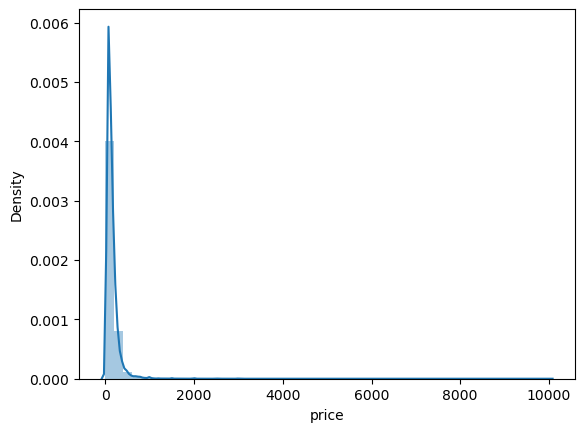

In [8]:
# Grafica de linea
sns.distplot(city["price"]);

Aqui podemos comprobar, que por una parte tenemos la cantidad de propiedadees inmobilarias por unidad de áerea y por otro lugar el precio de las viviendas por área.
- Nos dice que en una área, las casas de la inmobilaria cuestan más que en otras áreas.
- Podemos ver que hay 3 picos y luego una linea se aplana.
- Tambien que alcanza su punto maximo alrededor de 2.000 de eje X y el 0.006 del eje Y


In [9]:
# Dos medidas estadisticas para la distribucción de los datos.
print("Skewness: %f" % city["price"].skew())
print("Kurtosis: %f" % city["price"].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


Skewness, dice que hay asimetría positiva muy pronunciada y en Kurtosis veo que hay una mayor conceentración de valores, esto indica que tiene que haber valores extremos o inusuales en los datos.